## WeGo Data Introduction

In [1]:
import pandas as pd

In [3]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [5]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [6]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [7]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [10]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [11]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [12]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

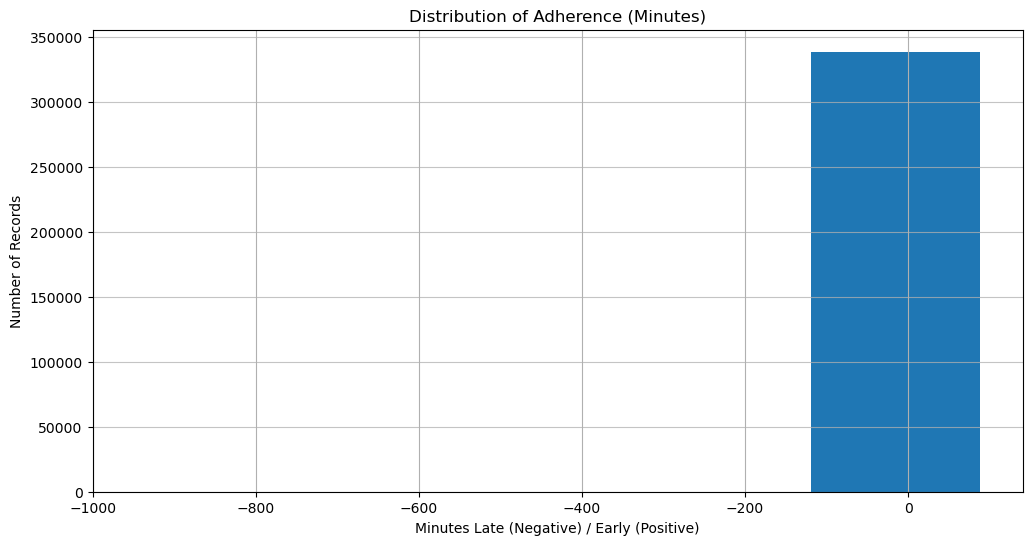

In [30]:
plt.figure(figsize=(12, 6))
# Adjust range based on describe() output if needed, e.g., range=(-15, 10)
wego['ADHERENCE'].hist(bins=5)
plt.title('Distribution of Adherence (Minutes)')
plt.xlabel('Minutes Late (Negative) / Early (Positive)') # Label based on dictionary definition
plt.ylabel('Number of Records')
plt.grid(axis='y', alpha=0.75)
plt.show()

                mean    median       std  count
ROUTE_ABBR                                     
3          -3.761491 -2.566666  5.415910  45488
7          -3.346555 -2.116666  6.669753  17267
22         -1.138107 -0.933333  6.391798  25188
23         -1.760110 -1.316666  7.680491  39653
50         -2.505022 -1.800000  6.159666  42629
52         -3.971342 -2.066666  8.721732  49327
55         -4.823302 -2.883333  7.535092  60359
56         -2.703988 -1.900000  4.931009  58950


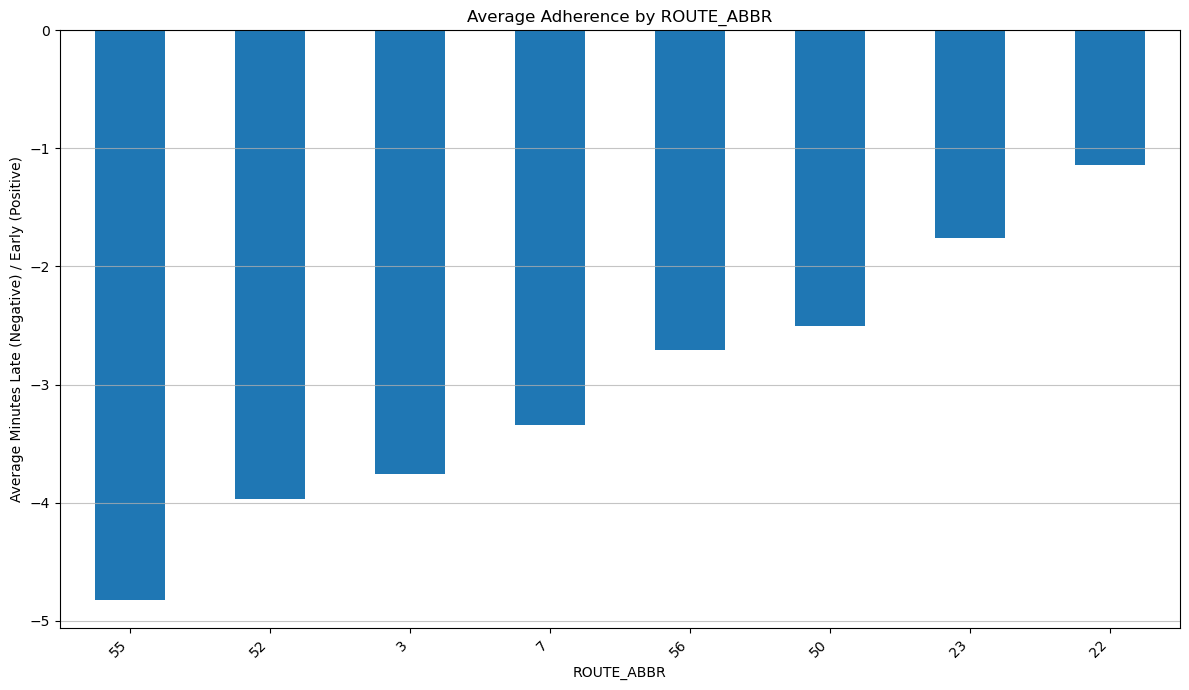

In [24]:
route_col = 'ROUTE_ABBR'
adherence_by_route = wego.groupby(route_col)['ADHERENCE'].agg(['mean', 'median', 'std', 'count'])
print(adherence_by_route)


plt.figure(figsize=(12, 7))
adherence_by_route['mean'].sort_values().plot(kind='bar')
plt.title(f'Average Adherence by {route_col}')
plt.xlabel(f'{route_col}')
plt.ylabel('Average Minutes Late (Negative) / Early (Positive)') # Label based on dictionary definition
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

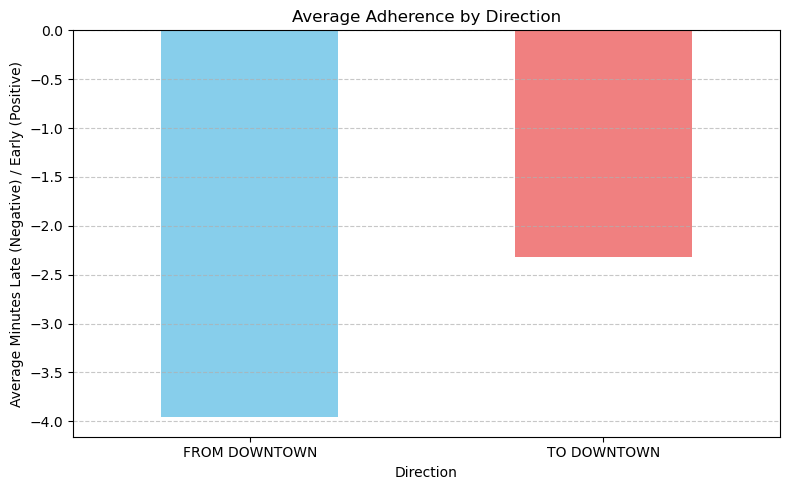

In [28]:
direction_col = 'ROUTE_DIRECTION_NAME'
adherence_col = 'ADHERENCE'
on_time_lower = -6
on_time_upper = 1
adherence_by_direction = wego.groupby(direction_col)[adherence_col].agg(['mean', 'median', 'std', 'count'])


# Bar chart for Average Adherence by Direction
plt.figure(figsize=(8, 5))
adherence_by_direction['mean'].plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Adherence by Direction')
plt.xlabel('Direction')
plt.ylabel('Average Minutes Late (Negative) / Early (Positive)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# Bar chart for % On-Time by Direction
ontime_by_edge = wego.groupby('TRIP_EDGE')[adherence_col].apply(
        percent_on_time, lower=on_time_lower, upper=on_time_upper
    )
plt.figure(figsize=(8, 5))
ontime_by_direction.plot(kind='bar', color=['skyblue', 'lightcoral']) # Adjust colors if more directions
plt.title(f'% On-Time ({on_time_lower} to +{on_time_upper} mins) by Direction')
plt.xlabel('Direction')
plt.ylabel('Percentage On-Time (%)')
plt.ylim(0, 100) # Set y-axis limit for percentage
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'percent_on_time' is not defined

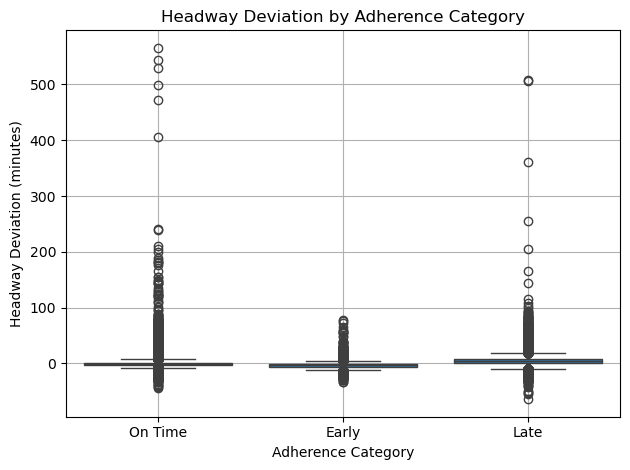

In [35]:
adherence_vs_headway = wego[["ADHERENCE", "HDWY_DEV", "SCHEDULED_HDWY"]].dropna()


#Create categories
def categorize_adherence(x):
    if x > 1:
        return "Early"
    elif x < -6:
        return "Late"
    else:
        return "On Time"

adherence_vs_headway["Adherence_Category"] = adherence_vs_headway["ADHERENCE"].apply(categorize_adherence)

#Boxplot
plt.figure()
sns.boxplot(x="Adherence_Category", y="HDWY_DEV", data=adherence_vs_headway)
plt.title("Headway Deviation by Adherence Category")
plt.xlabel("Adherence Category")
plt.ylabel("Headway Deviation (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
adherence_vs_headway.describe()

,ADHERENCE,HDWY_DEV,SCHEDULED_HDWY
count,265893.000000,265893.000000,265893.000000
mean,-3.503376,0.518081,18.104595
std,6.501201,7.161798,11.907397
min,-948.533333,-64.000000,0.000000
25%,-4.616666,-2.316667,10.000000
50%,-2.216666,0.033333,15.000000
75%,-0.666666,2.483333,20.000000
max,85.666666,565.433333,503.000000


In [38]:
# Defining the unique trip identifier.
if 'DATE' in wego.columns:
    trip_date_col = 'DATE'
elif 'CALENDAR_ID' in wego.columns:
    trip_date_col = 'CALENDAR_ID'
else:
    print("Warning: Cannot find DATE or CALENDAR_ID column for unique trip identification.")
    # Group only by TRIP_ID
    trip_date_col = None 

unique_trip_cols = ['TRIP_ID', trip_date_col] if trip_date_col else ['TRIP_ID']

In [39]:
#  Get first stop data (TRIP_EDGE == 1)
first_stops = wego[wego['TRIP_EDGE'] == 1].copy()
first_stops = first_stops.dropna(subset=unique_trip_cols + ['ADHERENCE', 'HDWY_DEV'])
first_stops_agg = first_stops.groupby(unique_trip_cols).agg(
    first_stop_adherence=('ADHERENCE', 'mean'),
    first_stop_hdw_dev=('HDWY_DEV', 'mean')
).reset_index()


In [41]:
first_stops.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,...,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,...,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,...,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0


In [48]:
# Get last stop data (TRIP_EDGE == 2)
# There is no actual headway for the last stop data
last_stops = wego[wego['TRIP_EDGE'] == 2].copy()

In [49]:
last_stops.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
10,120230801,1,99457900,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
13,120230801,1,99457903,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
17,120230801,1,99457907,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN


In [53]:
# For the sake of the comparison frame, I will still create an aggregate frame for the last stops. 
# The results will contain NaaNs
last_stops = last_stops.dropna(subset=unique_trip_cols + ['ADHERENCE', 'HDWY_DEV'])
last_stops_agg = last_stops.groupby(unique_trip_cols).agg(
    last_stop_adherence=('ADHERENCE', 'mean'),
    last_stop_hdw_dev=('HDWY_DEV', 'mean')
).reset_index()

In [54]:
last_stops_agg.head()

,TRIP_ID,DATE,last_stop_adherence,last_stop_hdw_dev


In [52]:
# Now to merge the columns
trip_comparison = pd.merge(first_stops_agg, last_stops_agg, on=unique_trip_cols, how='inner')
trip_comparison.head()

,TRIP_ID,DATE,first_stop_adherence,first_stop_hdw_dev,last_stop_adherence,last_stop_hdw_dev
0,345106,2023-08-01,-1.716666,2.666666,4.483333,NaN
1,345106,2023-08-02,-1.033333,1.983333,10.133333,NaN
2,345106,2023-08-03,-3.316666,4.266666,5.733333,NaN
3,345107,2023-08-01,-1.316666,-2.166667,4.016666,NaN
4,345107,2023-08-02,-1.783333,-0.850000,3.150000,NaN



Correlation between first stop adherence and last stop adherence: 0.451


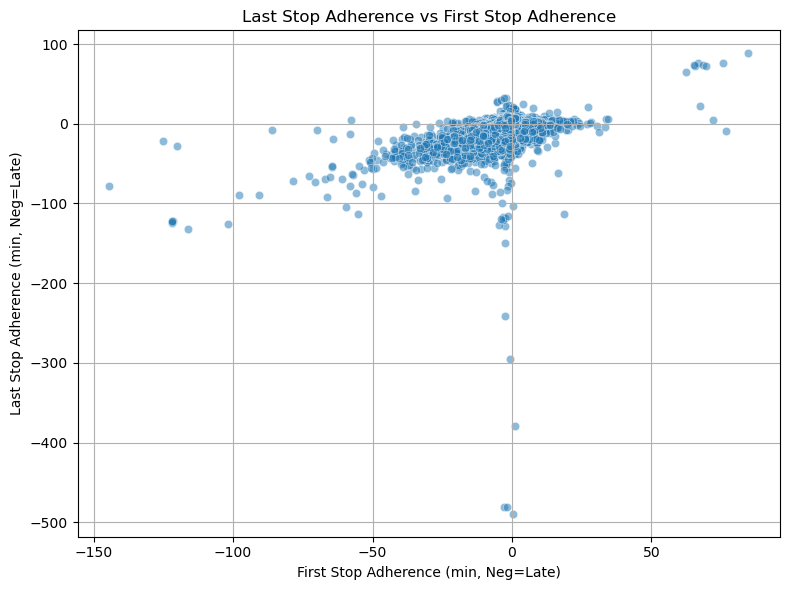

In [56]:
# I will now attempt to analyze a correlation
if not trip_comparison.empty:
    # Adherence Correlation
    corr_adherence = trip_comparison['first_stop_adherence'].corr(trip_comparison['last_stop_adherence'])
    print(f"\nCorrelation between first stop adherence and last stop adherence: {corr_adherence:.3f}")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=trip_comparison, x='first_stop_adherence', y='last_stop_adherence', alpha=0.5)
    plt.title('Last Stop Adherence vs First Stop Adherence')
    plt.xlabel('First Stop Adherence (min, Neg=Late)')
    plt.ylabel('Last Stop Adherence (min, Neg=Late)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Could not create trip comparison data. Check filters or data.")